In [103]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

## EDA - Social and economic dataframes

In [104]:
education_inequality = pd.read_csv(r"inequality-in-education.csv")
education_inequality.sort_values (by= 'Year', ascending=False)
# The Atkinson index measures inequality on a scale from 0 to 1. Higher values indicate higher inequality. 
# Inequality is measured here in terms of the number of years adults older than 25participated in formal education.

,Entity,Code,Year,Inequality in education
2300,Zimbabwe,ZWE,2022,0.146050
1280,Maldives,MDV,2022,0.293195
1926,South Sudan,SSD,2022,0.395526
1228,Luxembourg,LUX,2022,0.081350
470,Congo,COG,2022,0.209322
...,...,...,...,...
1845,Slovakia,SVK,2010,0.019593
193,Belgium,BEL,2010,0.105153
1858,Slovenia,SVN,2010,0.031776
829,Guinea,GIN,2010,0.420000


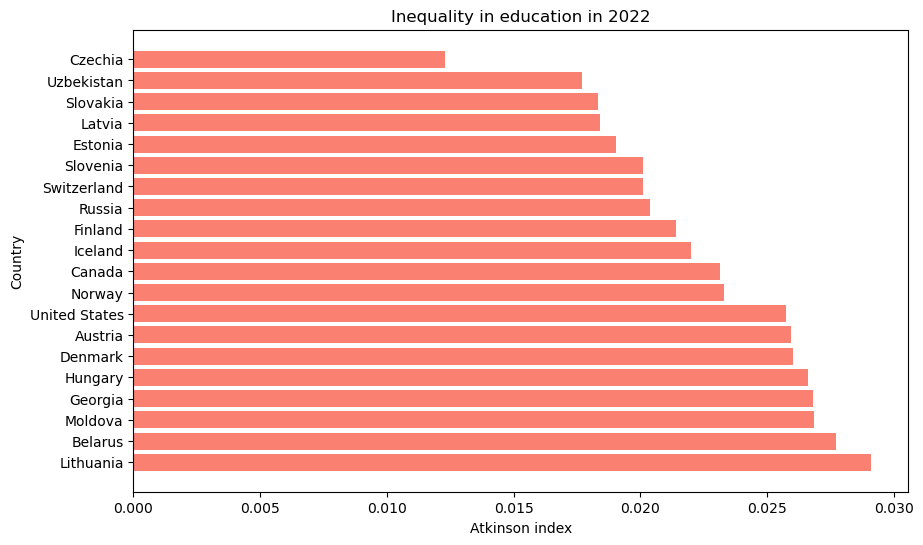

In [105]:
education_2022 = education_inequality[education_inequality['Year'] == 2022].sort_values(by='Inequality in education', ascending=True).head(20)
plt.figure(figsize=(10,6))
plt.barh(education_2022['Entity'], education_2022['Inequality in education'], color='salmon')
plt.xlabel('Atkinson index')
plt.ylabel('Country')
plt.title('Inequality in education in 2022')
plt.gca().invert_yaxis()
plt.show()
# top lowest inequality

In [106]:
literacy = pd.read_csv(r"cross-country-literacy-rates.csv")
literacy.sort_values (by= 'Year', ascending=False)
# The share of adults aged 15 and older who can both read and write.

,Entity,Code,Year,Historical and more recent literacy estimates
2315,Zimbabwe,ZWE,2022,89.85000
2157,Uzbekistan,UZB,2022,99.99998
986,Laos,LAO,2022,87.52000
1811,South Asia (WB),NaN,2022,74.18776
313,Central Europe and the Baltics (WB),NaN,2022,99.42752
...,...,...,...,...
1381,Netherlands,NLD,1475,17.00000
1853,Spain,ESP,1475,3.00000
1943,Sweden,SWE,1475,1.00000
918,Ireland,IRL,1475,0.00000


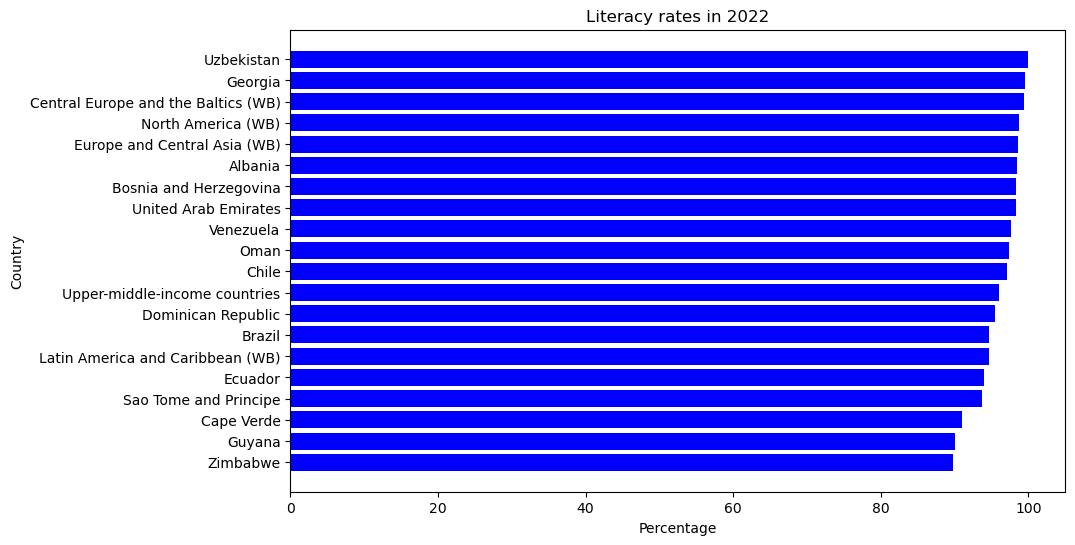

In [107]:
literacy_2022 = literacy[literacy['Year'] == 2022].sort_values(by='Historical and more recent literacy estimates', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(literacy_2022['Entity'], literacy_2022['Historical and more recent literacy estimates'], color='blue')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Literacy rates in 2022')
plt.gca().invert_yaxis()
plt.show()
# top highest rates

In [108]:
learning_outcomes = pd.read_csv(r"learning-adjusted-years-of-school-lays.csv")
learning_outcomes.sort_values (by= 'Year', ascending=False)
# Learning-adjusted years of schooling merge the quantity and quality of education into one metric, accounting for the fact that similar durations of schooling can yield different learning outcomes.
# Learning-Adjusted Years of School are calculated by multiplying the estimates of Expected Years of School by the ratio of most recent Harmonized Test Score to 625, where 625 corresponds to advancement attainment on the TIMSS (Trends in International Mathematics and Science Study) test

,Entity,Code,Year,Learning-Adjusted Years of School
600,Zimbabwe,ZWE,2020,7.006610
153,Egypt,EGY,2020,6.529363
526,Switzerland,CHE,2020,10.933773
440,Portugal,PRT,2020,11.310053
141,Dominican Republic,DOM,2020,6.558533
...,...,...,...,...
236,Iran,IRN,2010,7.950358
472,Serbia,SRB,2010,9.430452
243,Ireland,IRL,2010,11.299463
247,Israel,ISR,2010,10.416695


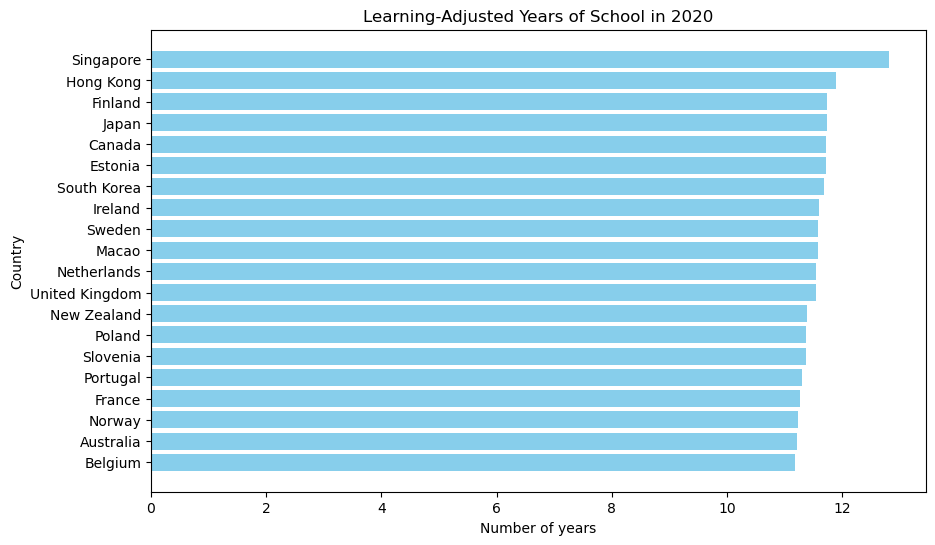

In [109]:
learning_2020 = learning_outcomes[learning_outcomes['Year'] == 2020].sort_values(by='Learning-Adjusted Years of School', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(learning_2020['Entity'], learning_2020['Learning-Adjusted Years of School'], color='skyblue')
plt.xlabel('Number of years')
plt.ylabel('Country')
plt.title('Learning-Adjusted Years of School in 2020')
plt.gca().invert_yaxis()
plt.show()
# top highest

In [110]:
economic_inequality = pd.read_csv(r"economic-inequality-gini-index.csv")
economic_inequality.sort_values (by= 'Year', ascending=False)

# The Gini coefficient measures inequality on a scale from 0 to 1. 
# Higher values indicate higher inequality.

,Entity,Code,Year,Gini coefficient
1027,Indonesia,IDN,2023,0.383067
1058,Indonesia (rural),NaN,2023,0.313349
1652,Panama,PAN,2023,0.488765
1089,Indonesia (urban),NaN,2023,0.408760
1948,Suriname,SUR,2022,0.391799
...,...,...,...,...
2190,United States,USA,1967,0.368902
2189,United States,USA,1966,0.377862
2188,United States,USA,1965,0.375022
2187,United States,USA,1964,0.381448


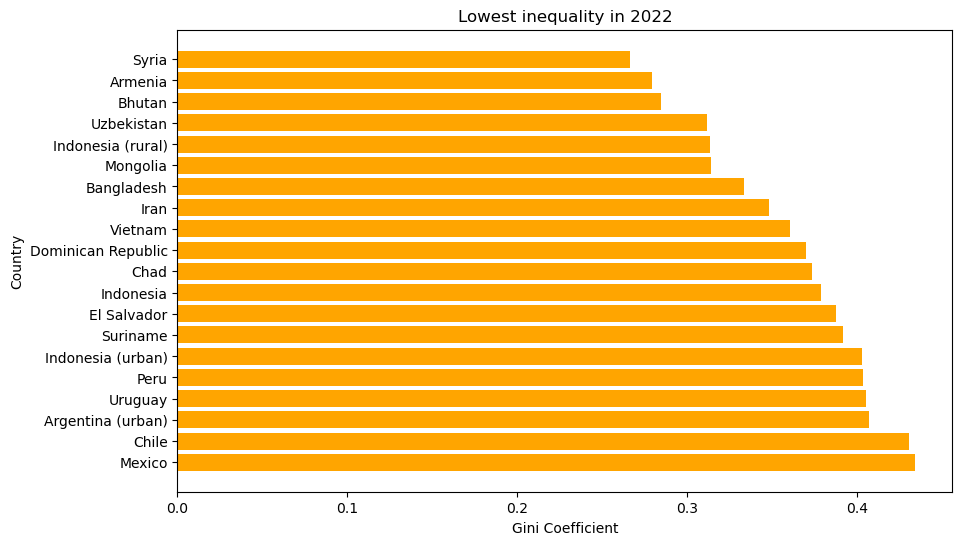

In [111]:
inequality_2022 = economic_inequality[economic_inequality['Year'] == 2022].sort_values(by='Gini coefficient', ascending=True).head(20)
plt.figure(figsize=(10,6))
plt.barh(inequality_2022['Entity'], inequality_2022['Gini coefficient'], color='orange')
plt.xlabel('Gini Coefficient')
plt.ylabel('Country')
plt.title('Lowest inequality in 2022')
plt.gca().invert_yaxis()
plt.show()

In [112]:
poverty = pd.read_csv(r"share-of-population-in-extreme-poverty.csv")
poverty.sort_values (by= 'Year', ascending=False)

# Percentage of population living in households with an income or consumption per person below $2.15 a day

,Entity,Code,Year,$2.15 a day - Share of population in poverty
1183,Indonesia (urban),NaN,2023,1.550411
1841,Panama,PAN,2023,1.288193
1152,Indonesia (rural),NaN,2023,2.348261
1121,Indonesia,IDN,2023,1.880944
2509,Uruguay,URY,2022,0.155176
...,...,...,...,...
2438,United States,USA,1967,0.998477
2437,United States,USA,1966,0.998223
2436,United States,USA,1965,0.999596
2435,United States,USA,1964,1.242510


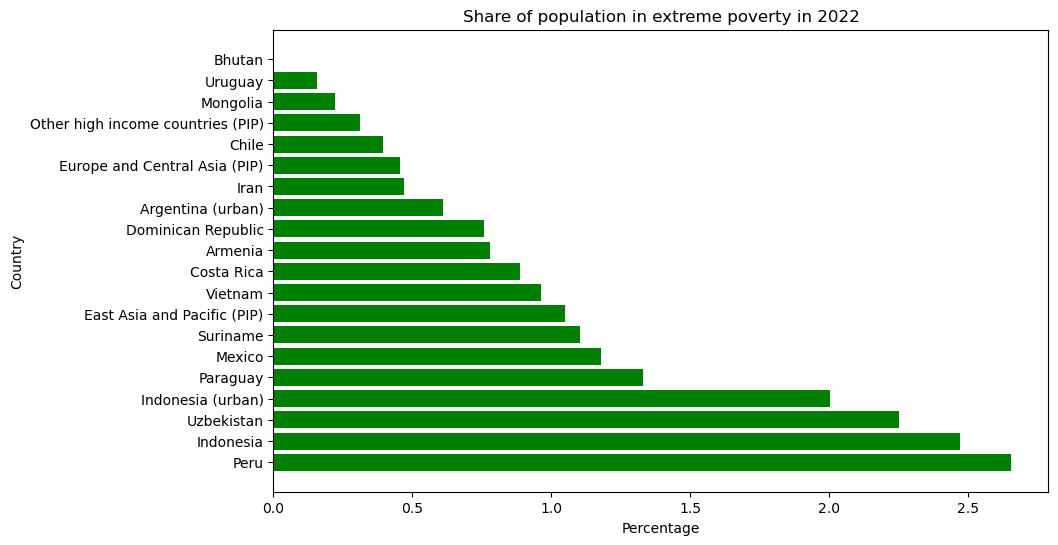

In [113]:
poverty_2022 = poverty[poverty['Year'] == 2022].sort_values(by='$2.15 a day - Share of population in poverty', ascending=True).head(20)
plt.figure(figsize=(10,6))
plt.barh(poverty_2022['Entity'], poverty_2022['$2.15 a day - Share of population in poverty'], color='green')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Share of population in extreme poverty in 2022')
plt.gca().invert_yaxis()
plt.show()
# lowest rates

In [114]:
gdp = pd.read_csv(r"gdp-per-capita-maddison.csv")
gdp.sort_values (by= 'Year', ascending=False)
# This data is adjusted for inflation and for differences in the cost of living between countries.

,Entity,Code,Year,GDP per capita,900793-annotations
21585,Zimbabwe,ZWE,2022,1703.5294,NaN
19122,Tunisia,TUN,2022,10913.8460,NaN
4405,Dominican Republic,DOM,2022,17713.5200,NaN
18972,Togo,TGO,2022,1586.5889,NaN
4332,Dominica,DMA,2022,8879.6455,NaN
...,...,...,...,...,...
4582,Egypt,EGY,1,1116.0000,NaN
18340,Switzerland,CHE,1,956.0000,NaN
19046,Tunisia,TUN,1,1116.0000,NaN
19123,Turkey,TUR,1,897.0000,NaN


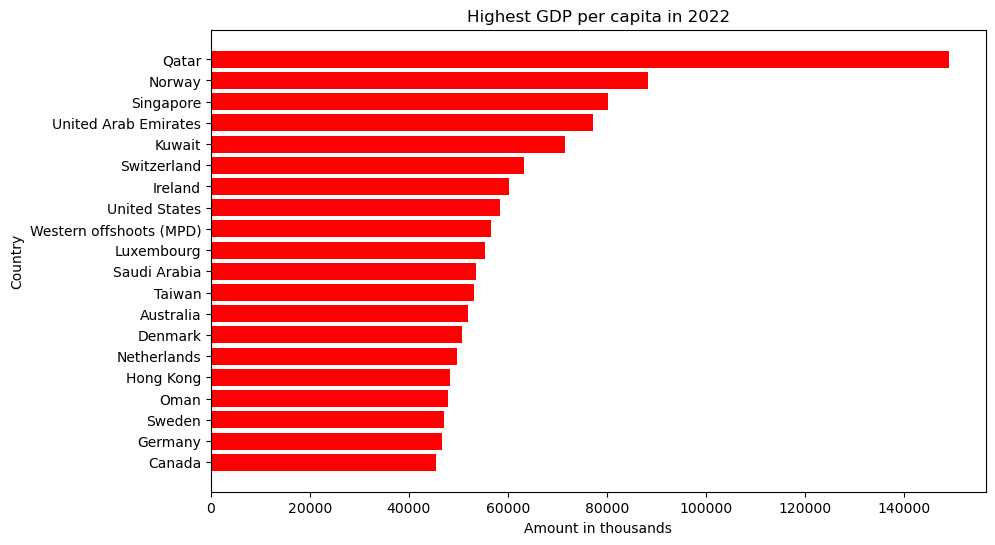

In [115]:
gdp_2022 = gdp[gdp['Year'] == 2022].sort_values(by='GDP per capita', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(gdp_2022['Entity'], gdp_2022['GDP per capita'], color='red')
plt.xlabel('Amount in thousands')
plt.ylabel('Country')
plt.title('Highest GDP per capita in 2022')
plt.gca().invert_yaxis()
plt.show()
# highest sums

In [116]:
hdi = pd.read_csv(r"human-development-index.csv")
hdi.sort_values (by= 'Year', ascending=False)
# The Human Development Index (HDI) is a summary measure of key dimensions of human development: a long and healthy life, a good education, and a decent standard of living. 
# Higher values indicate higher human development.

,Entity,Code,Year,Human Development Index
6170,Zimbabwe,ZWE,2022,0.550
4102,North Macedonia,MKD,2022,0.765
3889,Nauru,NRU,2022,0.696
3922,Nepal,NPL,2022,0.601
3955,Netherlands,NLD,2022,0.946
...,...,...,...,...
3091,Lesotho,LSO,1990,0.479
5419,Tanzania,TZA,1990,0.366
3148,Libya,LBY,1990,0.724
716,Brazil,BRA,1990,0.620


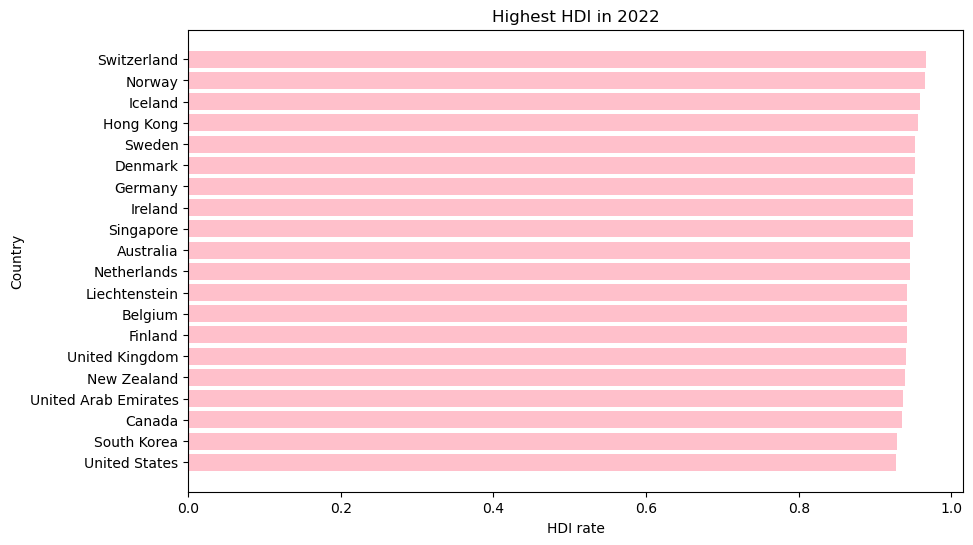

In [117]:
hdi_2022 = hdi[hdi['Year'] == 2022].sort_values(by='Human Development Index', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(hdi_2022['Entity'], hdi_2022['Human Development Index'], color='pink')
plt.xlabel('HDI rate')
plt.ylabel('Country')
plt.title('Highest HDI in 2022')
plt.gca().invert_yaxis()
plt.show()
# highest rates

In [118]:
government_expenditure = pd.read_csv(r"total-government-expenditure-on-education-gdp.csv")
government_expenditure.sort_values (by= 'Year', ascending=False)
# Total general government expenditure on education (all levels of government and all levels of education), given as a share of GDP.

,Entity,Code,Year,Historical and more recent expenditure estimates
4338,South Africa,ZAF,2022,6.183480
2973,Malaysia,MYS,2022,3.505549
115,Antigua and Barbuda,ATG,2022,3.563353
5017,Uruguay,URY,2022,4.369734
2026,Haiti,HTI,2022,1.274669
...,...,...,...,...
3541,Norway,NOR,1870,0.500000
4888,United Kingdom,GBR,1870,0.100000
2409,Japan,JPN,1870,1.000000
1817,Germany,DEU,1870,1.300000


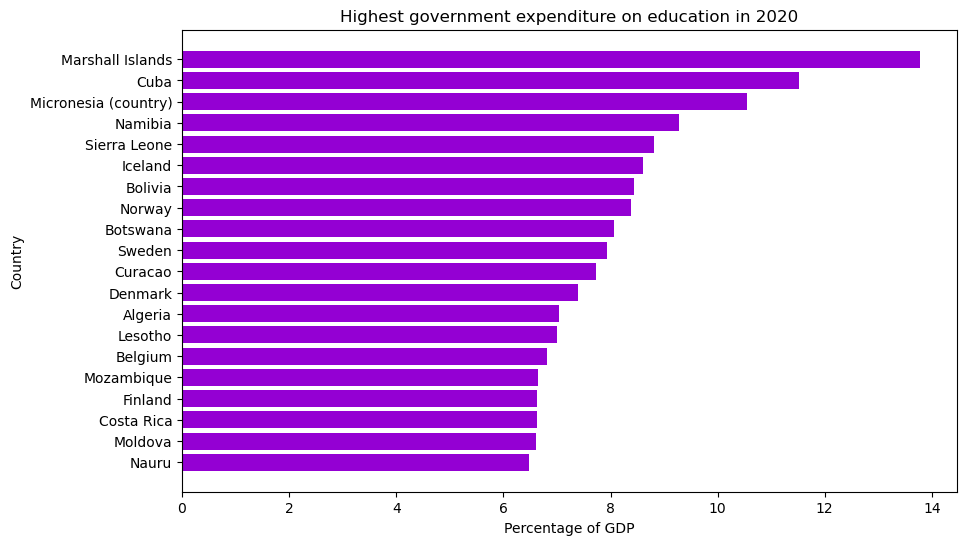

In [119]:
government_expenditure_2020 = government_expenditure[government_expenditure['Year'] == 2020].sort_values(by='Historical and more recent expenditure estimates', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(government_expenditure_2020['Entity'], government_expenditure_2020['Historical and more recent expenditure estimates'], color='darkviolet')
plt.xlabel('Percentage of GDP')
plt.ylabel('Country')
plt.title('Highest government expenditure on education in 2020')
plt.gca().invert_yaxis()
plt.show()
# highest expenditures

In [120]:
research_spending = pd.read_csv(r"research-spending-gdp.csv")
research_spending.sort_values (by= 'Year', ascending=False)
# Includes basic research, applied research, and experimental development by governments as a share of GDP

,Entity,Code,Year,Research and development expenditure (% of GDP)
1111,Kazakhstan,KAZ,2021,0.132450
651,Europe and Central Asia (WB),NaN,2020,2.109941
98,Austria,AUT,2020,3.201280
1579,North Macedonia,MKD,2020,0.375600
1400,Middle-income countries,NaN,2020,1.864394
...,...,...,...,...
374,Costa Rica,CRI,1996,0.302210
2060,Switzerland,CHE,1996,2.373920
982,Ireland,IRL,1996,1.271560
1721,Portugal,PRT,1996,0.549500


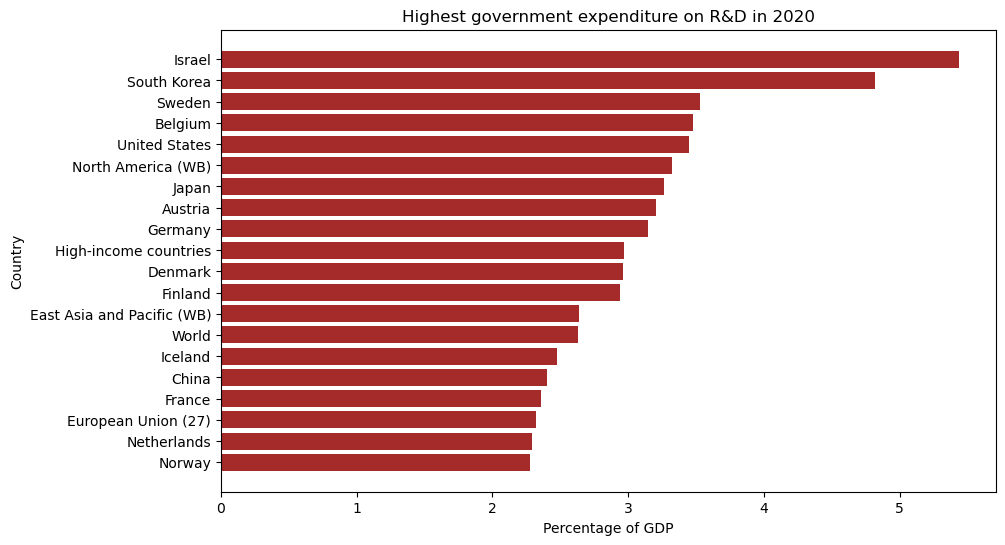

In [121]:
research_spending_2020 = research_spending[research_spending['Year'] == 2020].sort_values(by='Research and development expenditure (% of GDP)', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(research_spending_2020['Entity'], research_spending_2020['Research and development expenditure (% of GDP)'], color='brown')
plt.xlabel('Percentage of GDP')
plt.ylabel('Country')
plt.title('Highest government expenditure on R&D in 2020')
plt.gca().invert_yaxis()
plt.show()
# highest expenditures

In [122]:
rd_researchers = pd.read_csv(r"researchers-in-rd-per-million-people.csv")
rd_researchers.sort_values (by= 'Year', ascending=False)
# Professionals engaged in conceiving or creating new knowledge, products, processes, methods, or systems.

,Entity,Code,Year,Researchers in R&D (per million people)
825,Kazakhstan,KAZ,2021,629.85120
153,Bulgaria,BGR,2020,2402.12000
58,Austria,AUT,2020,5751.32280
1415,Serbia,SRB,2020,2167.11040
850,Kuwait,KWT,2020,173.51310
...,...,...,...,...
654,Hungary,HUN,1996,1007.31165
63,Belgium,BEL,1996,2461.70360
345,East Asia and Pacific (WB),NaN,1996,887.16370
1024,Mexico,MEX,1996,213.57630


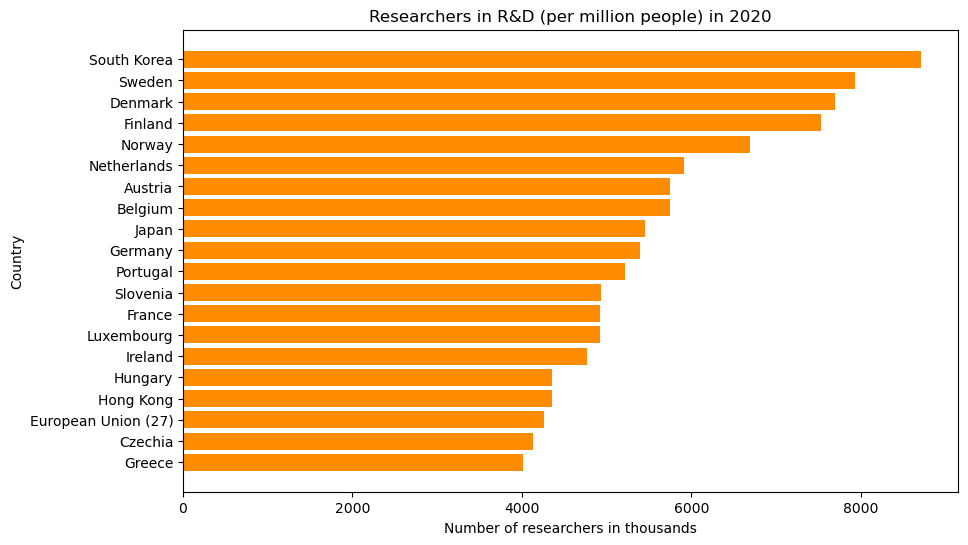

In [123]:
rd_researchers_2020 = rd_researchers[rd_researchers['Year'] == 2020].sort_values(by='Researchers in R&D (per million people)', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(rd_researchers_2020['Entity'], rd_researchers_2020['Researchers in R&D (per million people)'], color='darkorange')
plt.xlabel('Number of researchers in thousands')
plt.ylabel('Country')
plt.title('Researchers in R&D (per million people) in 2020')
plt.gca().invert_yaxis()
plt.show()
# highest numbers

In [124]:
articles_published = pd.read_csv(r"scientific-and-technical-journal-articles.csv")
articles_published.sort_values (by= 'Year', ascending=False)
# Includes physics, biology, chemistry, mathematics, clinical medicine, biomedical research, engineering and technology,and earth and space sciences.

,Entity,Code,Year,Scientific and technical journal articles
4008,Zimbabwe,ZWE,2018,359.33
3381,South Sudan,SSD,2018,9.08
189,Austria,AUT,2018,12362.28
3818,United States,USA,2018,422807.72
1329,Ghana,GHA,2018,1275.99
...,...,...,...,...
2888,Portugal,PRT,2000,3343.65
1140,Europe and Central Asia (WB),NaN,2000,433936.88
2869,Poland,POL,2000,13012.68
1159,European Union (27),NaN,2000,289120.62


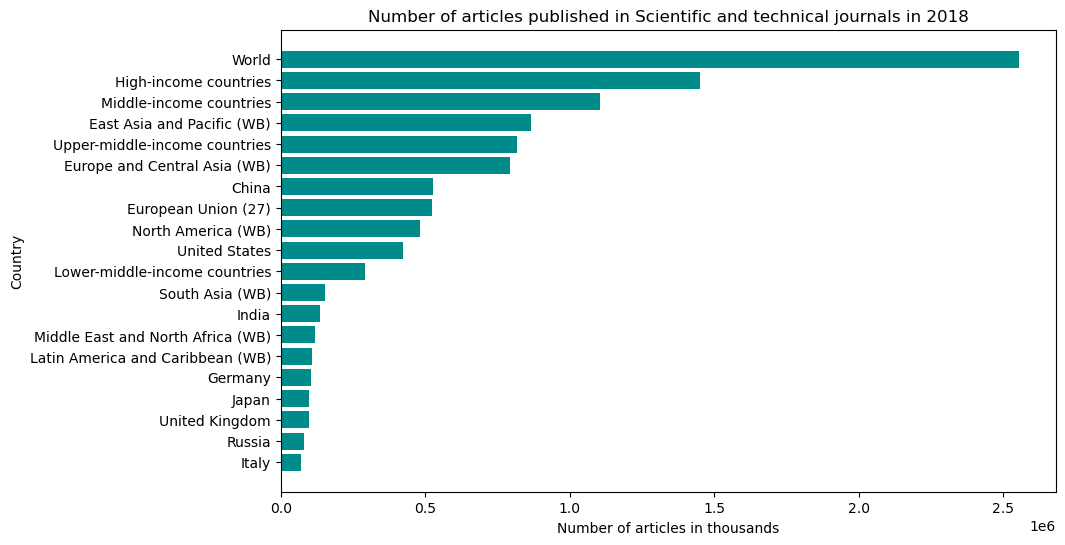

In [125]:
articles_published_2018 = articles_published[articles_published['Year'] == 2018].sort_values(by='Scientific and technical journal articles', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(articles_published_2018['Entity'], articles_published_2018['Scientific and technical journal articles'], color='darkcyan')
plt.xlabel('Number of articles in thousands')
plt.ylabel('Country')
plt.title('Number of articles published in Scientific and technical journals in 2018')
plt.gca().invert_yaxis()
plt.show()
# highest numbers

In [126]:
population = pd.read_csv(r"population-with-un-projections.csv")
population.sort_values (by= 'Year', ascending=False)

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium
38353,Zimbabwe,ZWE,2100,NaN,35633412.0
16307,Italy,ITA,2100,NaN,36874250.0
35937,Ukraine,UKR,2100,NaN,20432790.0
30501,Saudi Arabia,SAU,2100,NaN,50468332.0
4529,Botswana,BWA,2100,NaN,4177616.0
...,...,...,...,...,...
24764,Nicaragua,NIC,1950,1.330447e+06,NaN
24613,New Zealand,NZL,1950,1.911611e+06,NaN
24462,New Caledonia,NCL,1950,6.388400e+04,NaN
24311,Netherlands,NLD,1950,1.009356e+07,NaN


### Mergedataframes

In [127]:
merged_df = pd.merge(population, gdp, on=['Entity', 'Code', 'Year'], how='left')
merged_df = pd.merge(merged_df, hdi, on=['Entity','Code', 'Year'], how='left')
merged_df = pd.merge(merged_df, poverty, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, economic_inequality, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, learning_outcomes, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, literacy, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, education_inequality, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, government_expenditure, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, research_spending, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, rd_researchers, on=['Entity','Code','Year'], how='left')
merged_df = pd.merge(merged_df, articles_published, on=['Entity','Code','Year'], how='left')
merged_df.drop(columns=['900793-annotations'], inplace=True)
merged_df

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium,GDP per capita,Human Development Index,$2.15 a day - Share of population in poverty,Gini coefficient,Learning-Adjusted Years of School,Historical and more recent literacy estimates,Inequality in education,Historical and more recent expenditure estimates,Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles
0,Afghanistan,AFG,1950,7480464.0,NaN,1156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951,7571542.0,NaN,1170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952,7667534.0,NaN,1189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953,7764549.0,NaN,1240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954,7864289.0,NaN,1245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38349,Zimbabwe,ZWE,2096,NaN,35469604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38350,Zimbabwe,ZWE,2097,NaN,35517800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38351,Zimbabwe,ZWE,2098,NaN,35561276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38352,Zimbabwe,ZWE,2099,NaN,35599776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
indicators = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
indicators.columns = indicators.columns.str.lower().str.replace(' ', '_')
indicators.rename(columns={'entity': 'location', 'population_-_sex:_all_-_age:_all_-_variant:_estimates' : 'population_estimates', 'population_-_sex:_all_-_age:_all_-_variant:_medium' : 'population_medium', '$2.15_a_day_-_share_of_population_in_poverty' : 'population_in_poverty', 'historical_and_more_recent_literacy_estimates':'literacy_estimates' }, inplace=True)
indicators

,location,code,year,population_estimates,population_medium,gdp_per_capita,human_development_index,population_in_poverty,gini_coefficient,learning-adjusted_years_of_school,literacy_estimates,inequality_in_education,historical_and_more_recent_expenditure_estimates,research_and_development_expenditure_(%_of_gdp),researchers_in_r&d_(per_million_people),scientific_and_technical_journal_articles
68,Afghanistan,AFG,2018,36686788.0,NaN,1888.8140,0.486,NaN,NaN,4.949788,NaN,0.453652,NaN,NaN,NaN,111.72
69,Afghanistan,AFG,2019,37769496.0,NaN,2031.7373,0.492,NaN,NaN,NaN,NaN,0.453652,NaN,NaN,NaN,NaN
70,Afghanistan,AFG,2020,38972236.0,NaN,1928.4547,0.488,NaN,NaN,5.052838,NaN,0.453652,NaN,NaN,NaN,NaN
71,Afghanistan,AFG,2021,40099460.0,NaN,1485.5470,0.473,NaN,NaN,NaN,37.26604,0.453652,NaN,NaN,NaN,NaN
72,Afghanistan,AFG,2022,NaN,41128772.0,1357.9878,0.462,NaN,NaN,NaN,NaN,0.488101,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38273,Zimbabwe,ZWE,2020,15669663.0,NaN,1585.9728,0.554,NaN,NaN,7.006610,NaN,0.146050,NaN,NaN,NaN,NaN
38274,Zimbabwe,ZWE,2021,15993525.0,NaN,1687.2532,0.549,NaN,NaN,NaN,NaN,0.146050,NaN,NaN,NaN,NaN
38275,Zimbabwe,ZWE,2022,NaN,16320539.0,1703.5294,0.550,NaN,NaN,NaN,89.85000,0.146050,NaN,NaN,NaN,NaN
38276,Zimbabwe,ZWE,2023,NaN,16665407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
types_of_unique_values = ['location']
for column in types_of_unique_values:
    unique_values = indicators[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for location:
['Afghanistan' 'Africa (UN)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia (UN)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe (UN)' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland'
 'France' 'French 

### Correlations

In [130]:
indicators.columns

Index(['location', 'code', 'year', 'population_estimates', 'population_medium',
       'gdp_per_capita', 'human_development_index', 'population_in_poverty',
       'gini_coefficient', 'learning-adjusted_years_of_school',
       'literacy_estimates', 'inequality_in_education',
       'historical_and_more_recent_expenditure_estimates',
       'research_and_development_expenditure_(%_of_gdp)',
       'researchers_in_r&d_(per_million_people)',
       'scientific_and_technical_journal_articles'],
      dtype='object')

In [131]:
indicators_corr = indicators[['year', 'population_estimates', 'population_medium',
       'gdp_per_capita', 'human_development_index', 'population_in_poverty',
       'gini_coefficient', 'learning-adjusted_years_of_school',
       'literacy_estimates', 'inequality_in_education',
       'historical_and_more_recent_expenditure_estimates',
       'research_and_development_expenditure_(%_of_gdp)',
       'researchers_in_r&d_(per_million_people)',
       'scientific_and_technical_journal_articles']]
correlations_indicators = indicators_corr.corr()['inequality_in_education']
correlations_indicators.sort_values(ascending=False)

inequality_in_education                             1.000000
population_in_poverty                               0.564230
gini_coefficient                                    0.320315
population_medium                                   0.035329
population_estimates                                0.032228
year                                               -0.018154
scientific_and_technical_journal_articles          -0.028668
historical_and_more_recent_expenditure_estimates   -0.267835
research_and_development_expenditure_(%_of_gdp)    -0.351195
researchers_in_r&d_(per_million_people)            -0.514979
gdp_per_capita                                     -0.544609
learning-adjusted_years_of_school                  -0.803391
human_development_index                            -0.823447
literacy_estimates                                 -0.835661
Name: inequality_in_education, dtype: float64

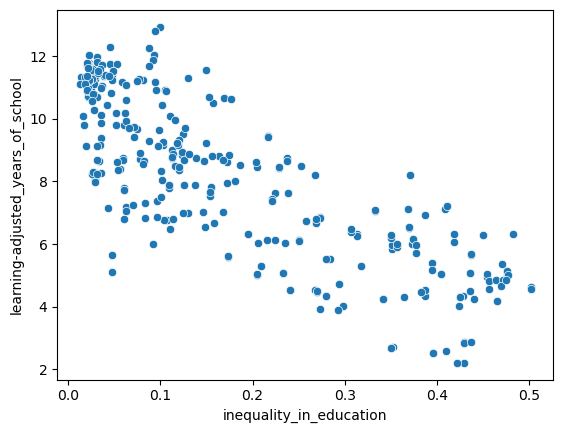

In [132]:
sns.scatterplot(x = indicators['inequality_in_education'], y = indicators['learning-adjusted_years_of_school'])
plt.show()
# the longer people stay in school, the lower the inequality index

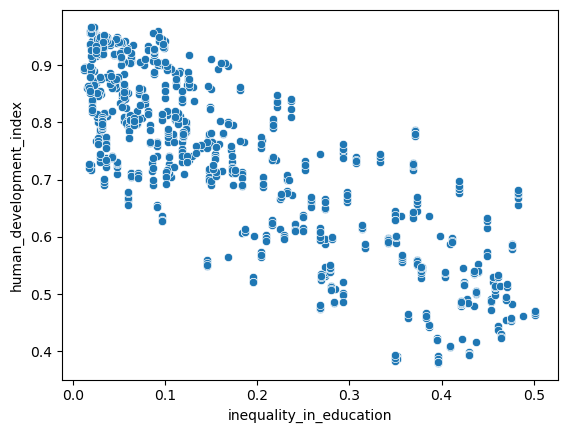

In [133]:
sns.scatterplot(x = indicators['inequality_in_education'], y = indicators['human_development_index'])
plt.show()
# the higher the hdi index, the lower the inequality index

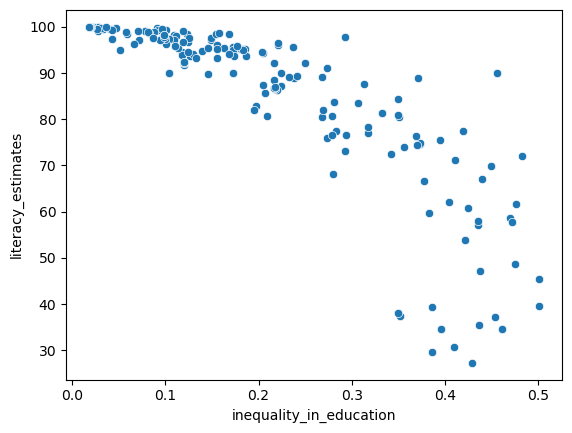

In [134]:
sns.scatterplot(x = indicators['inequality_in_education'], y = indicators['literacy_estimates'])
plt.show()
# the higher the literacy rates, the lower the inequality

## EDA - University rankings

In [135]:
uni_rank = pd.read_excel(r"2024 QS World University Rankings 1.2 (For qs.com).xlsx")
uni_rank

,2024_rank,2023_rank,Institution Name,location code,location,size,focus,research,status,ar score,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,B,100.0,...,56.0,88.2,128.0,94.3,58.0,100.0,4.0,95.2,51.0,100
1,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,A,100.0,...,64.0,95.8,85.0,99.9,7.0,100.0,6.0,97.3,33.0,99.2
2,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,A,100.0,...,110.0,98.2,60.0,100.0,1.0,100.0,3.0,97.8,26.0,98.9
3,4,5,Harvard University,US,United States,L,FC,VH,B,100.0,...,210.0,66.8,223.0,100.0,5.0,100.0,1.0,96.7,39.0,98.3
4,5,3,Stanford University,US,United States,L,FC,VH,B,100.0,...,78.0,51.2,284.0,95.8,44.0,100.0,2.0,94.4,63.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1401,NaN,University of Stavanger,NO,Norway,NaN,CO,NaN,NaN,7.2,...,NaN,NaN,NaN,26.3,489.0,NaN,NaN,NaN,NaN,-
1494,1401,1201-1400,"University Politehnica of Timisoara, UPT",RO,Romania,M,FO,VH,A,4.0,...,701.0,2.9,701.0,1.3,701.0,8.5,701.0,1.0,701.0,-
1495,1401,1201-1400,Western Washington University,US,United States,L,CO,HI,NaN,2.8,...,676.0,1.4,701.0,1.0,701.0,7.3,701.0,NaN,NaN,-
1496,1401,NaN,Zürcher Hochschule Winterthur,CH,Switzerland,NaN,CO,NaN,NaN,5.7,...,NaN,NaN,NaN,1.7,701.0,NaN,NaN,NaN,NaN,-


In [136]:
uni_rank.columns

Index(['2024_rank', '2023_rank', 'Institution Name', 'location code',
       'location', 'size', 'focus', 'research', 'status', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'SUS SCORE',
       'SUS RANK', 'Overall Score'],
      dtype='object')

In [137]:
uni_rank_23 = uni_rank [['2023_rank', 'Institution Name', 'location code',
       'location']]
uni_rank_23 = uni_rank_23[uni_rank_23['2023_rank'].notna()]
uni_rank_23['year'] = 2023
uni_rank_23

,2023_rank,Institution Name,location code,location,year
0,1,Massachusetts Institute of Technology (MIT),US,United States,2023
1,2,University of Cambridge,UK,United Kingdom,2023
2,4,University of Oxford,UK,United Kingdom,2023
3,5,Harvard University,US,United States,2023
4,3,Stanford University,US,United States,2023
...,...,...,...,...,...
1486,1401,University of Craiova,RO,Romania,2023
1488,1201-1400,University of Kragujevac,RS,Serbia,2023
1492,1401,University of Oradea,RO,Romania,2023
1494,1201-1400,"University Politehnica of Timisoara, UPT",RO,Romania,2023


In [138]:
# other scores and ranks only belong to the ranking of 2024
uni_rank_24 = uni_rank [['2024_rank', 'Institution Name', 'location code',
       'location', 'size', 'focus', 'research', 'status', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'SUS SCORE',
       'SUS RANK', 'Overall Score']]
uni_rank_24 = uni_rank_24[uni_rank_24['2024_rank'].notna()]
uni_rank_24['year'] = 2024
uni_rank_24

,2024_rank,Institution Name,location code,location,size,focus,research,status,ar score,ar rank,...,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score,year
0,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,B,100.0,4,...,88.2,128.0,94.3,58.0,100.0,4.0,95.2,51.0,100,2024
1,2,University of Cambridge,UK,United Kingdom,L,FC,VH,A,100.0,3,...,95.8,85.0,99.9,7.0,100.0,6.0,97.3,33.0,99.2,2024
2,3,University of Oxford,UK,United Kingdom,L,FC,VH,A,100.0,2,...,98.2,60.0,100.0,1.0,100.0,3.0,97.8,26.0,98.9,2024
3,4,Harvard University,US,United States,L,FC,VH,B,100.0,1,...,66.8,223.0,100.0,5.0,100.0,1.0,96.7,39.0,98.3,2024
4,5,Stanford University,US,United States,L,FC,VH,B,100.0,5,...,51.2,284.0,95.8,44.0,100.0,2.0,94.4,63.0,98.1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1401,University of Stavanger,NO,Norway,NaN,CO,NaN,NaN,7.2,601,...,NaN,NaN,26.3,489.0,NaN,NaN,NaN,NaN,-,2024
1494,1401,"University Politehnica of Timisoara, UPT",RO,Romania,M,FO,VH,A,4.0,601,...,2.9,701.0,1.3,701.0,8.5,701.0,1.0,701.0,-,2024
1495,1401,Western Washington University,US,United States,L,CO,HI,NaN,2.8,601,...,1.4,701.0,1.0,701.0,7.3,701.0,NaN,NaN,-,2024
1496,1401,Zürcher Hochschule Winterthur,CH,Switzerland,NaN,CO,NaN,NaN,5.7,601,...,NaN,NaN,1.7,701.0,NaN,NaN,NaN,NaN,-,2024


In [139]:
uni_rank = pd.concat([uni_rank_23, uni_rank_24], ignore_index=True, sort=False)
uni_rank

,2023_rank,Institution Name,location code,location,year,2024_rank,size,focus,research,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
0,1,Massachusetts Institute of Technology (MIT),US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Cambridge,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,University of Oxford,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Harvard University,US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Stanford University,US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,NaN,University of Stavanger,NO,Norway,2024,1401,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,26.3,489.0,NaN,NaN,NaN,NaN,-
2909,NaN,"University Politehnica of Timisoara, UPT",RO,Romania,2024,1401,M,FO,VH,A,...,701.0,2.9,701.0,1.3,701.0,8.5,701.0,1.0,701.0,-
2910,NaN,Western Washington University,US,United States,2024,1401,L,CO,HI,NaN,...,676.0,1.4,701.0,1.0,701.0,7.3,701.0,NaN,NaN,-
2911,NaN,Zürcher Hochschule Winterthur,CH,Switzerland,2024,1401,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,1.7,701.0,NaN,NaN,NaN,NaN,-


In [140]:
uni_rank.columns = uni_rank.columns.str.lower().str.replace(' ', '_')
uni_rank

,2023_rank,institution_name,location_code,location,year,2024_rank,size,focus,research,status,...,ifr_rank,isr_score,isr_rank,irn_score,irn_rank,ger_score,ger_rank,sus_score,sus_rank,overall_score
0,1,Massachusetts Institute of Technology (MIT),US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Cambridge,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,University of Oxford,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Harvard University,US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Stanford University,US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,NaN,University of Stavanger,NO,Norway,2024,1401,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,26.3,489.0,NaN,NaN,NaN,NaN,-
2909,NaN,"University Politehnica of Timisoara, UPT",RO,Romania,2024,1401,M,FO,VH,A,...,701.0,2.9,701.0,1.3,701.0,8.5,701.0,1.0,701.0,-
2910,NaN,Western Washington University,US,United States,2024,1401,L,CO,HI,NaN,...,676.0,1.4,701.0,1.0,701.0,7.3,701.0,NaN,NaN,-
2911,NaN,Zürcher Hochschule Winterthur,CH,Switzerland,2024,1401,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,1.7,701.0,NaN,NaN,NaN,NaN,-


### Concatenate dataframes

In [141]:
academic_performance = pd.concat([uni_rank, indicators], ignore_index=True)
academic_performance

,2023_rank,institution_name,location_code,location,year,2024_rank,size,focus,research,status,...,human_development_index,population_in_poverty,gini_coefficient,learning-adjusted_years_of_school,literacy_estimates,inequality_in_education,historical_and_more_recent_expenditure_estimates,research_and_development_expenditure_(%_of_gdp),researchers_in_r&d_(per_million_people),scientific_and_technical_journal_articles
0,1,Massachusetts Institute of Technology (MIT),US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Cambridge,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,University of Oxford,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Harvard University,US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Stanford University,US,United States,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,NaN,NaN,NaN,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,...,0.554,NaN,NaN,7.00661,NaN,0.14605,NaN,NaN,NaN,NaN
4687,NaN,NaN,NaN,Zimbabwe,2021,NaN,NaN,NaN,NaN,NaN,...,0.549,NaN,NaN,NaN,NaN,0.14605,NaN,NaN,NaN,NaN
4688,NaN,NaN,NaN,Zimbabwe,2022,NaN,NaN,NaN,NaN,NaN,...,0.550,NaN,NaN,NaN,89.85,0.14605,NaN,NaN,NaN,NaN
4689,NaN,NaN,NaN,Zimbabwe,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
academic_performance.columns

Index(['2023_rank', 'institution_name', 'location_code', 'location', 'year',
       '2024_rank', 'size', 'focus', 'research', 'status', 'ar_score',
       'ar_rank', 'er_score', 'er_rank', 'fsr_score', 'fsr_rank', 'cpf_score',
       'cpf_rank', 'ifr_score', 'ifr_rank', 'isr_score', 'isr_rank',
       'irn_score', 'irn_rank', 'ger_score', 'ger_rank', 'sus_score',
       'sus_rank', 'overall_score', 'code', 'population_estimates',
       'population_medium', 'gdp_per_capita', 'human_development_index',
       'population_in_poverty', 'gini_coefficient',
       'learning-adjusted_years_of_school', 'literacy_estimates',
       'inequality_in_education',
       'historical_and_more_recent_expenditure_estimates',
       'research_and_development_expenditure_(%_of_gdp)',
       'researchers_in_r&d_(per_million_people)',
       'scientific_and_technical_journal_articles'],
      dtype='object')

In [143]:
types_of_unique_values = ['location']

for column in types_of_unique_values:
    unique_values = academic_performance[column].unique()
    unique_values_list = list(unique_values)  
    unique_values_list.sort()  # Sort the list alphabetically
    
    print(f"Unique values for {column} in alphabetical order:")
    for value in unique_values_list:
        print(value)
    print()

Unique values for location in alphabetical order:
Afghanistan
Africa (UN)
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia (UN)
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
China (Mainland)
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe (UN)
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guat

In [144]:
location_mapping = {
    'China (Mainland)': 'China',
    'Czechia' : 'Czech Republic',
    'Democratic Republic of Congo': 'Congo',
    'Hong Kong SAR': 'Hong Kong',
    'Iran, Islamic Republic of': 'Iran',
    'Macau SAR': 'Macao',
    'Micronesia (country)': 'Micronesia',
    'Palestinian Territory, Occupied':'Palestine',
    'Saint Martin (French part)': 'Saint Martin',
    'Sint Maarten (Dutch part)':'Saint Martin',
    'Syrian Arab Republic': 'Syria',
}

# Replace the values in the 'location' column using the mapping
academic_performance['location'] = academic_performance['location'].replace(location_mapping)

In [145]:
types_of_unique_values = ['2023_rank', 'institution_name', 'location_code', 'location', 'size',
       'focus', 'research', 'status', 'ar_score', 'ar_rank', 'er_score',
       'er_rank', 'fsr_score', 'fsr_rank', 'cpf_score', 'cpf_rank',
       'ifr_score', 'ifr_rank', 'isr_score', 'isr_rank', 'irn_score',
       'irn_rank', 'ger_score', 'ger_rank', 'sus_score', 'sus_rank',
       'overall_score', 'year', '2024_rank', 'code', 'population_estimates',
       'population_medium', 'gdp_per_capita', 'human_development_index',
       'population_in_poverty', 'gini_coefficient',
       'learning-adjusted_years_of_school', 'literacy_estimates',
       'inequality_in_education',
       'historical_and_more_recent_expenditure_estimates',
       'research_and_development_expenditure_(%_of_gdp)',
       'researchers_in_r&d_(per_million_people)',
       'scientific_and_technical_journal_articles']
for column in types_of_unique_values:
    unique_values = academic_performance[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for 2023_rank:
['1' '2' '4' '5' '3' 6 '9' '11' '8' '27' '10' '13' '20' '33' '18' '12' 16
 '45' '41' 34 '15' '22' '26' '14' '19' '21' 24 '23' '44' '31' '28' '25'
 '30' '47' '49' '48' '39' '37' '29' '57' 50 42 56 '36' 61 '32' '38' '46'
 '52' '58' '59' '72' '60' '40' '76' '53' '80' '85' 65 '70' '64' '87' '77'
 '54' '69' '90' '63' '89' '86' '81' '73' '92' '74' '68' '98' '78' '93'
 '91' '95' '115' '75' '109' '137' '55' 83 '108' 104 '67' 96 '88' 118 129
 '71' '114' '121' '128' 147 '82' 112 116 '122' '110' '154' '79' 172 106
 '134' '101' '153' 141 131 '146' '139' '138' '136' '120' 125 195 '151' 102
 '171' 164 '159' 143 '94' '145' 190 '133' '161' '100' '99' 179 '178' '140'
 '124' '163' 167 '166' '158' '123' 185 '149' '157' '135' '184' '162' '188'
 '229' 226 181 208 '192' 237 '219' '160' '242' '193' '111' '170' 203 '152'
 222 210 '189' 174 '194' 220 155 215 205 233 '228' 217 '214' 246 212 224
 256 '169' 197 260 '202' 240 243 '232' '252' 340 '150' '266' '177' 281 248
 '292' '201' 2

In [146]:
academic_performance.dtypes
# some lower rankings are displayed within a range and some overall scores had a '-' symbol, I had to remove them to be able to convert strings to numbers

2023_rank                                            object
institution_name                                     object
location_code                                        object
location                                             object
year                                                  int64
2024_rank                                            object
size                                                 object
focus                                                object
research                                             object
status                                               object
ar_score                                            float64
ar_rank                                             float64
er_score                                            float64
er_rank                                             float64
fsr_score                                           float64
fsr_rank                                            float64
cpf_score                               

In [147]:
# Function to clean the overall_score column
def clean_overall_score(score):
    if pd.isna(score):
        return np.nan
    score_str = str(score)  # Convert score to string for further checks
    if '-' in score_str:
        return np.nan
    try:
        return float(score_str)  # Convert the score to float
    except ValueError:
        return np.nan

# Apply the cleaning function to the 'overall_score' column
academic_performance['overall_score'] = academic_performance['overall_score'].apply(clean_overall_score)

# Convert the cleaned overall_score column to numeric
academic_performance['overall_score'] = pd.to_numeric(academic_performance['overall_score'], errors='coerce')

In [148]:
# Function to clean the ranking columns by removing rows with hyphens
def clean_ranking_columns(df, columns):
    for column in columns:
        # Filter out rows with hyphens in the specified column
        df = df[~df[column].astype(str).str.contains('-')]
    return df

# Apply the cleaning function to remove rows with ranges in the '2023_rank' and '2024_rank' columns
columns_to_clean = ['2023_rank', '2024_rank']
academic_performance = clean_ranking_columns(academic_performance, columns_to_clean)

# Convert the cleaned rank columns to numeric
academic_performance['2023_rank'] = pd.to_numeric(academic_performance['2023_rank'], errors='coerce')
academic_performance['2024_rank'] = pd.to_numeric(academic_performance['2024_rank'], errors='coerce')

In [149]:
# academic_performance.to_excel('academic_performance.xlsx')

## Filtered Dataset

In [161]:
academic_performance = pd.read_excel(r"academic_performance.xlsx")
academic_performance

,Unnamed: 0,2023_rank,institution_name,location_code,location,year,2024_rank,size,focus,research,...,human_development_index,population_in_poverty,gini_coefficient,learning-adjusted_years_of_school,literacy_estimates,inequality_in_education,historical_and_more_recent_expenditure_estimates,research_and_development_expenditure_(%_of_gdp),researchers_in_r&d_(per_million_people),scientific_and_technical_journal_articles
0,0,1.0,Massachusetts Institute of Technology (MIT),US,United States,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,University of Cambridge,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.0,University of Oxford,UK,United Kingdom,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5.0,Harvard University,US,United States,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3.0,Stanford University,US,United States,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,4686,NaN,NaN,NaN,Zimbabwe,2020,NaN,NaN,NaN,NaN,...,0.554,NaN,NaN,7.00661,NaN,0.14605,NaN,NaN,NaN,NaN
2982,4687,NaN,NaN,NaN,Zimbabwe,2021,NaN,NaN,NaN,NaN,...,0.549,NaN,NaN,NaN,NaN,0.14605,NaN,NaN,NaN,NaN
2983,4688,NaN,NaN,NaN,Zimbabwe,2022,NaN,NaN,NaN,NaN,...,0.550,NaN,NaN,NaN,89.85,0.14605,NaN,NaN,NaN,NaN
2984,4689,NaN,NaN,NaN,Zimbabwe,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
academic_performance = academic_performance.drop('Unnamed: 0', axis=1)
col1 = academic_performance.pop('year') 
academic_performance.insert(0, 'year', col1)
col2 = academic_performance.pop('2024_rank') 
academic_performance.insert(1, '2024_rank', col2)
col3 = academic_performance.pop('location_code') 
academic_performance['location_code'] = col3
col4 = academic_performance.pop('code') 
academic_performance['code'] = col4

academic_performance.columns

Index(['year', '2024_rank', '2023_rank', 'institution_name', 'location',
       'size', 'focus', 'research', 'status', 'ar_score', 'ar_rank',
       'er_score', 'er_rank', 'fsr_score', 'fsr_rank', 'cpf_score', 'cpf_rank',
       'ifr_score', 'ifr_rank', 'isr_score', 'isr_rank', 'irn_score',
       'irn_rank', 'ger_score', 'ger_rank', 'sus_score', 'sus_rank',
       'overall_score', 'population_estimates', 'population_medium',
       'gdp_per_capita', 'human_development_index', 'population_in_poverty',
       'gini_coefficient', 'learning-adjusted_years_of_school',
       'literacy_estimates', 'inequality_in_education',
       'historical_and_more_recent_expenditure_estimates',
       'research_and_development_expenditure_(%_of_gdp)',
       'researchers_in_r&d_(per_million_people)',
       'scientific_and_technical_journal_articles', 'location_code', 'code'],
      dtype='object')

In [165]:
# Filter for countries and universities to be on the top 500 rankings

def filter_top_universities(academic_performance, years, rank_threshold=500):
    # Step 1: Identify countries with universities ranked within the top threshold for any given year
    countries = set()
    for year in years:
        ranked_countries = academic_performance[
            (academic_performance[f'{year}_rank'].notna()) & 
            (academic_performance[f'{year}_rank'] <= rank_threshold)
        ]['location'].drop_duplicates().to_list()
        countries.update(ranked_countries)

    # Step 2: Identify universities ranked within the top threshold in all specified years
    universities = set()
    for year in years:
        ranked_universities = academic_performance[
            (academic_performance[f'{year}_rank'].notna()) & 
            (academic_performance[f'{year}_rank'] <= rank_threshold)
        ]['institution_name'].drop_duplicates().to_list()
        if universities:
            universities.intersection_update(ranked_universities)
        else:
            universities.update(ranked_universities)

    # Step 3: Filter the dataset to include only the relevant countries and universities
    academic_performance = academic_performance[
        academic_performance['location'].isin(countries)
    ]
    
    academic_performance = academic_performance[
        (academic_performance['institution_name'].isin(universities)) | 
        (academic_performance['institution_name'].isna())  # include na to include other parameters for those countries
    ]
    
     
    return academic_performance


years = [2023, 2024]
academic_performance_filtered = filter_top_universities(academic_performance, years)
academic_performance_filtered

,year,2024_rank,2023_rank,institution_name,location,size,focus,research,status,ar_score,...,gini_coefficient,learning-adjusted_years_of_school,literacy_estimates,inequality_in_education,historical_and_more_recent_expenditure_estimates,research_and_development_expenditure_(%_of_gdp),researchers_in_r&d_(per_million_people),scientific_and_technical_journal_articles,location_code,code
0,2023,NaN,1.0,Massachusetts Institute of Technology (MIT),United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN
1,2023,NaN,2.0,University of Cambridge,United Kingdom,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK,NaN
2,2023,NaN,4.0,University of Oxford,United Kingdom,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK,NaN
3,2023,NaN,5.0,Harvard University,United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN
4,2023,NaN,3.0,Stanford University,United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2020,NaN,NaN,NaN,Uruguay,NaN,NaN,NaN,NaN,NaN,...,0.401561,8.551203,NaN,0.081583,4.543070,NaN,767.1869,NaN,NaN,URY
2912,2021,NaN,NaN,NaN,Uruguay,NaN,NaN,NaN,NaN,NaN,...,0.407774,NaN,NaN,0.081583,4.413340,NaN,NaN,NaN,NaN,URY
2913,2022,NaN,NaN,NaN,Uruguay,NaN,NaN,NaN,NaN,NaN,...,0.405519,NaN,NaN,0.073356,4.369734,NaN,NaN,NaN,NaN,URY
2914,2023,NaN,NaN,NaN,Uruguay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URY


In [166]:
# save updated file for tableau
# academic_performance_filtered.to_excel('academic_performance_filtered.xlsx')

## EDA - Final Dataset

In [167]:
academic_performance_filtered.dtypes

year                                                  int64
2024_rank                                           float64
2023_rank                                           float64
institution_name                                     object
location                                             object
size                                                 object
focus                                                object
research                                             object
status                                               object
ar_score                                            float64
ar_rank                                             float64
er_score                                            float64
er_rank                                             float64
fsr_score                                           float64
fsr_rank                                            float64
cpf_score                                           float64
cpf_rank                                

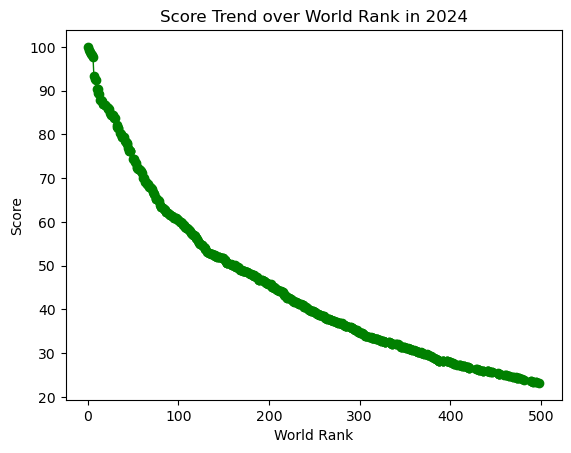

In [170]:
plt.plot(academic_performance_filtered['2024_rank'], academic_performance_filtered['overall_score'], marker='o', color='green', linestyle='-', linewidth=1)
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.title('Score Trend over World Rank in 2024')
plt.show()

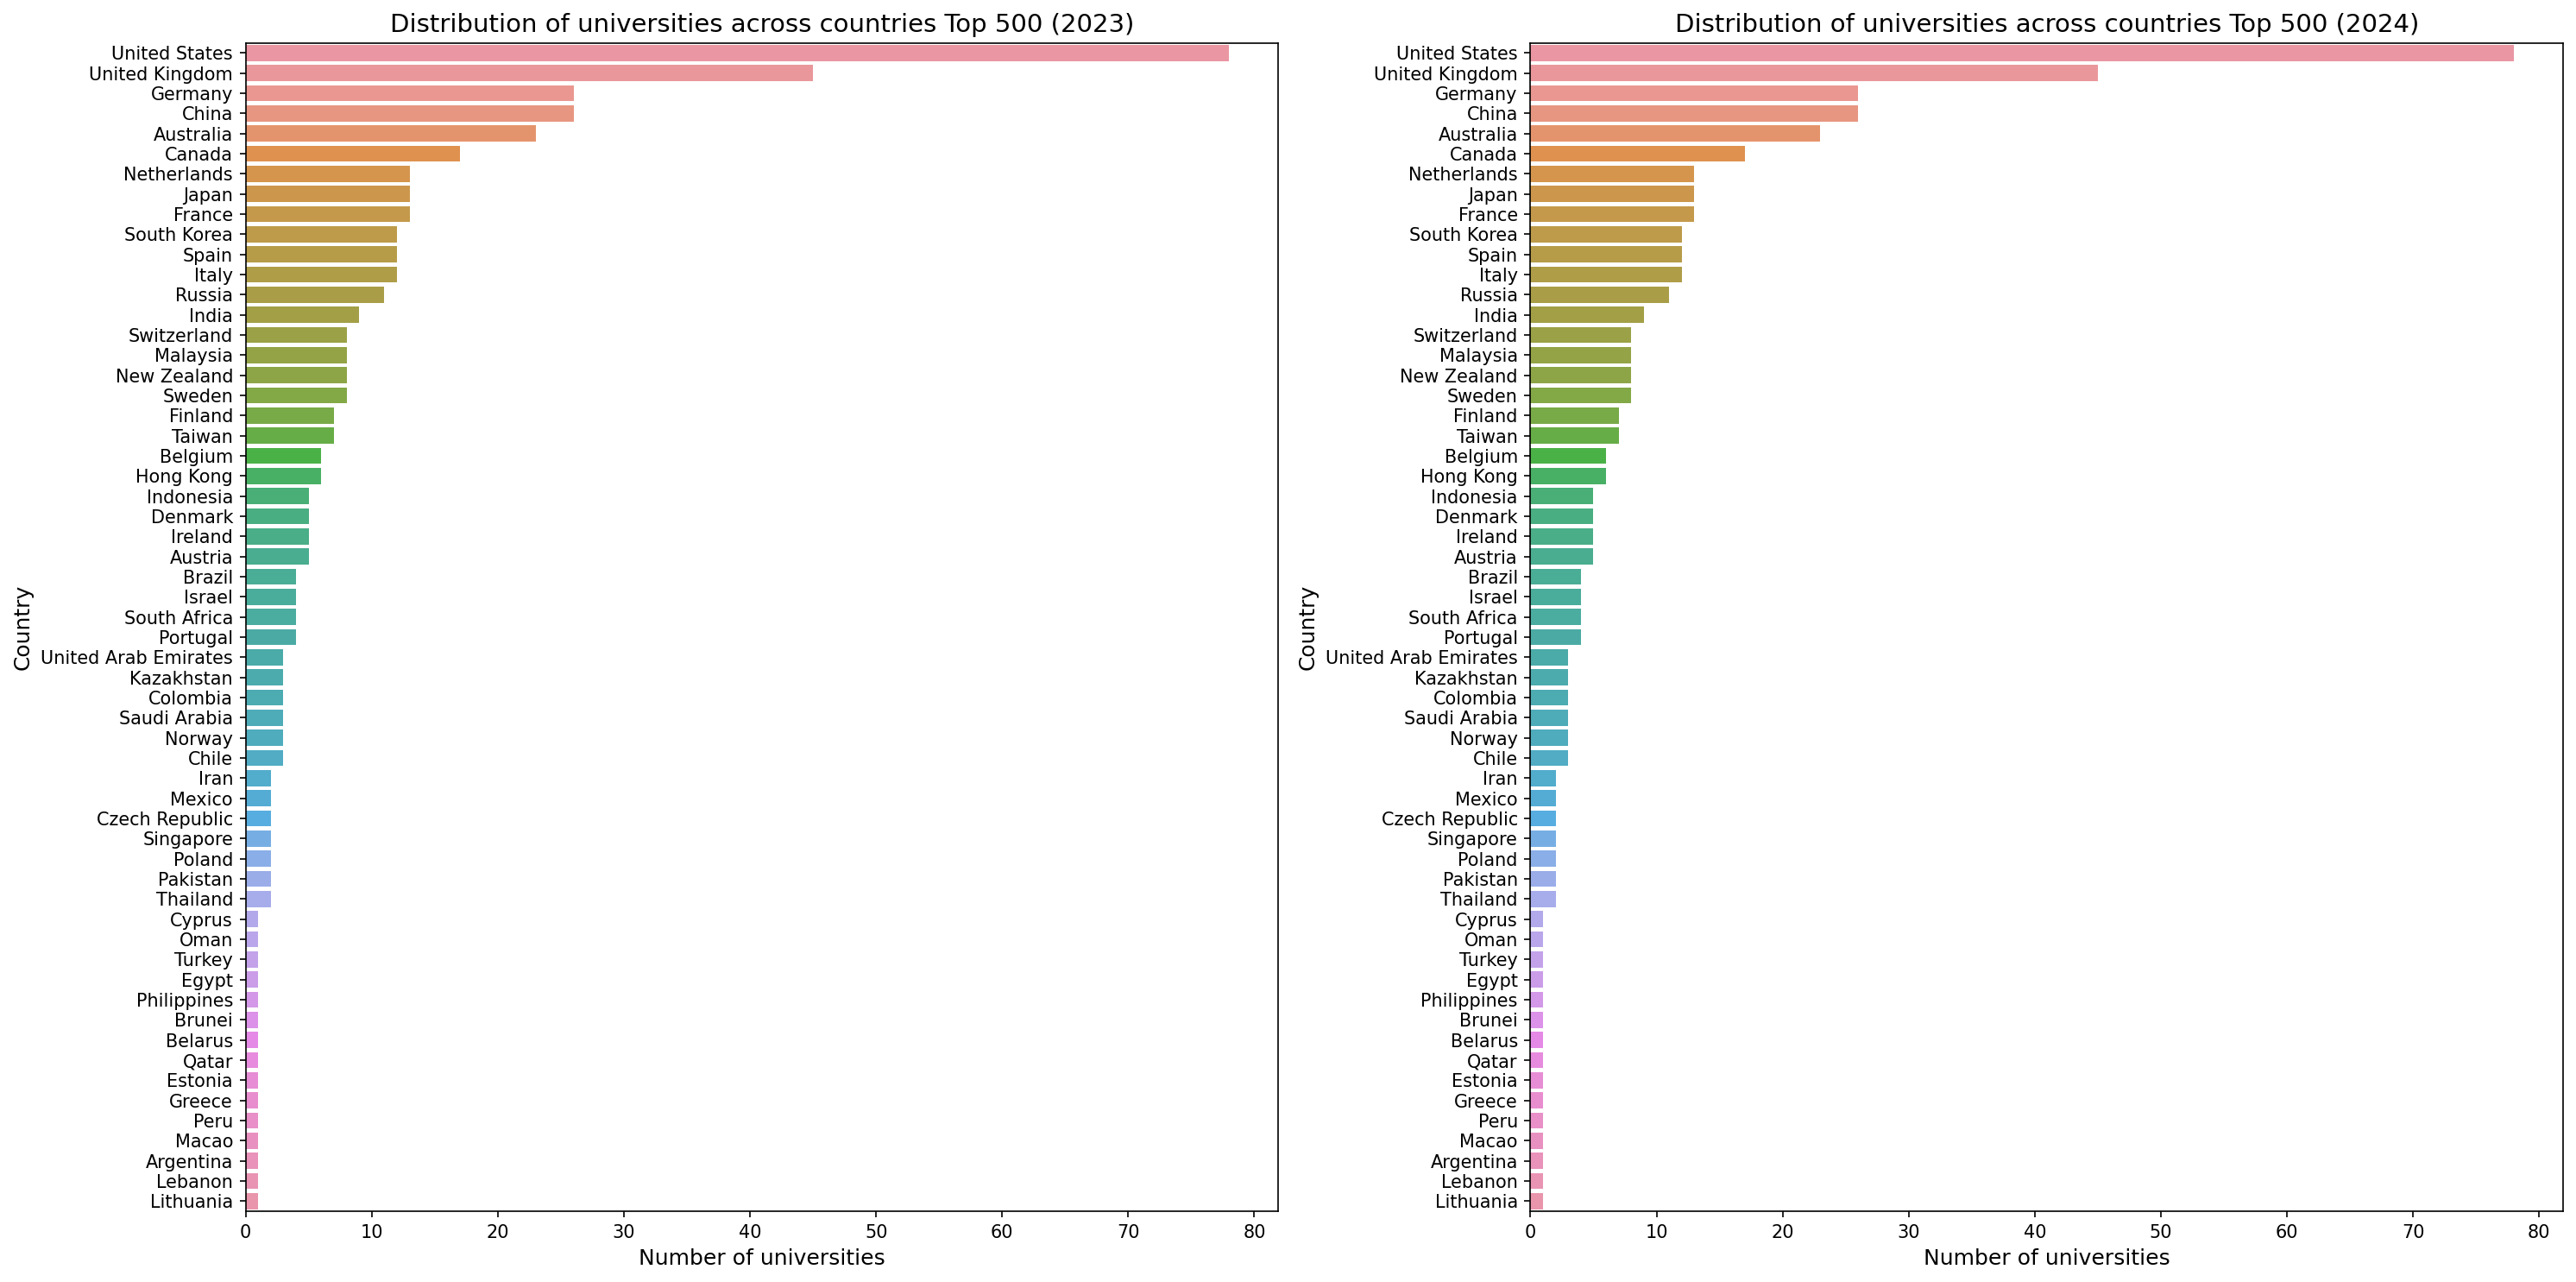

In [173]:
df_2023 = academic_performance_filtered[(academic_performance_filtered['year'] == 2023) & (academic_performance_filtered['2023_rank'] <= 500)]
df_2024 = academic_performance_filtered[(academic_performance_filtered['year'] == 2024) & (academic_performance_filtered['2024_rank'] <= 500)]

# Create the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=150)

# Plot for 2023
sns.countplot(data=df_2023, y='location', order=df_2023['location'].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Number of universities', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)
axes[0].set_title("Distribution of universities across countries Top 500 (2023)", fontsize=14)

# Plot for 2024
sns.countplot(data=df_2024, y='location', order=df_2024['location'].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Number of universities', fontsize=12)
axes[1].set_ylabel('Country', fontsize=12)
axes[1].set_title("Distribution of universities across countries Top 500 (2024)", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [180]:
df_corr = academic_performance_filtered[['year', '2023_rank', '2024_rank', 'ar_score',
       'ar_rank', 'er_score', 'er_rank', 'fsr_score', 'fsr_rank', 'cpf_score',
       'cpf_rank', 'ifr_score', 'ifr_rank', 'isr_score', 'isr_rank',
       'irn_score', 'irn_rank', 'ger_score', 'ger_rank', 'sus_score',
       'sus_rank', 'overall_score', 'population_estimates',
       'population_medium', 'gdp_per_capita', 'human_development_index',
       'population_in_poverty', 'gini_coefficient',
       'learning-adjusted_years_of_school', 'literacy_estimates',
       'inequality_in_education',
       'historical_and_more_recent_expenditure_estimates',
       'research_and_development_expenditure_(%_of_gdp)',
       'researchers_in_r&d_(per_million_people)',
       'scientific_and_technical_journal_articles']]

correlations = df_corr.corr()['overall_score']
correlations.sort_values(ascending=False)

overall_score                                       1.000000
ar_score                                            0.891275
er_score                                            0.753387
ger_score                                           0.688944
sus_score                                           0.560903
irn_score                                           0.513587
cpf_score                                           0.488369
isr_score                                           0.430187
ifr_score                                           0.359711
fsr_score                                           0.299005
fsr_rank                                           -0.289136
ifr_rank                                           -0.355369
isr_rank                                           -0.427931
cpf_rank                                           -0.480591
irn_rank                                           -0.497404
sus_rank                                           -0.552240
ger_rank                